Author: Ahmed Saied Ahmed Mohamed Elshita

mail: ahmedelshityfee53@gmail.com

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**NOTE THAT :**

---
you can't open data file directorey using => 

pd.read_csv(file-name) only 

because file encoding not UTF-8 
and if you do that you will get error :

**UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7127: invalid continuation byte** 

**SO** 

FIRST: you should know encoding type of file 



In [ ]:
import chardet
with open('/content/drive/MyDrive/Colab Notebooks/GRIP/TASK 4/globalterrorismdb_0718dist.csv','rb') as file:
  result = chardet.detect(file.read(10000))
  print(result)  

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


Read Data 

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/GRIP/TASK 4/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
pd.set_option('max_columns',None) 
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

**Cleaning and preparing data**

In [ ]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City'
             ,'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
             'nwound':'Wound','success':'success','suicide':'suicide','property':'property','individual':'individual'},inplace=True)

In [ ]:
df = df[['Year','Month','day','Country','Region','City',"Attacktype",'kill',
               'Wound','Group','Targettype','Weapon','success','suicide','property','individual']]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Year        181691 non-null  int64  
 1   Month       181691 non-null  int64  
 2   day         181691 non-null  int64  
 3   Country     181691 non-null  object 
 4   Region      181691 non-null  object 
 5   City        181257 non-null  object 
 6   Attacktype  181691 non-null  object 
 7   kill        171378 non-null  float64
 8   Wound       165380 non-null  float64
 9   Group       181691 non-null  object 
 10  Targettype  181691 non-null  object 
 11  Weapon      181691 non-null  object 
 12  success     181691 non-null  int64  
 13  suicide     181691 non-null  int64  
 14  property    181691 non-null  int64  
 15  individual  181691 non-null  int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 22.2+ MB


In [ ]:
df.isna().sum()

Year              0
Month             0
day               0
Country           0
Region            0
City            434
Attacktype        0
kill          10313
Wound         16311
Group             0
Targettype        0
Weapon            0
success           0
suicide           0
property          0
individual        0
dtype: int64

In [ ]:
df['kill'].fillna(0,inplace=True)
df['Wound'].fillna(0,inplace=True)

In [ ]:
df.head()

,Year,Month,day,Country,Region,City,Attacktype,kill,Wound,Group,Targettype,Weapon,success,suicide,property,individual
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,1.0,0.0,MANO-D,Private Citizens & Property,Unknown,1,0,0,0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown,1,0,0,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,1.0,0.0,Unknown,Journalists & Media,Unknown,1,0,0,0
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,0.0,0.0,Unknown,Government (Diplomatic),Explosives,1,0,1,0
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,0.0,0.0,Unknown,Government (Diplomatic),Incendiary,1,0,1,0


Visualization

**'10 Top Countries in Terrorist'**

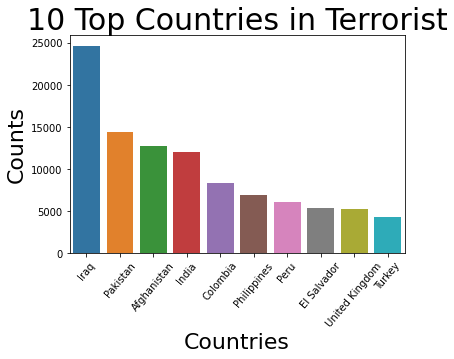

In [ ]:
CT=df['Country'].value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=CT.index,y=CT)
plt.xticks(rotation = 50)
plt.xlabel('Countries',fontsize=22)
plt.ylabel('Counts',fontsize=22)
plt.title('10 Top Countries in Terrorist',fontsize=30)
plt.show()

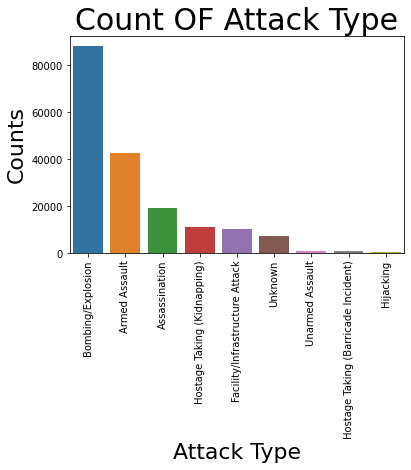

In [ ]:
AT=df['Attacktype'].value_counts().sort_values(ascending=False)
sns.barplot(x=AT.index,y=AT)
plt.xticks(rotation =90)
plt.xlabel('Attack Type',fontsize=22)
plt.ylabel('Counts',fontsize=22)
plt.title('Count OF Attack Type',fontsize=30)
plt.show()

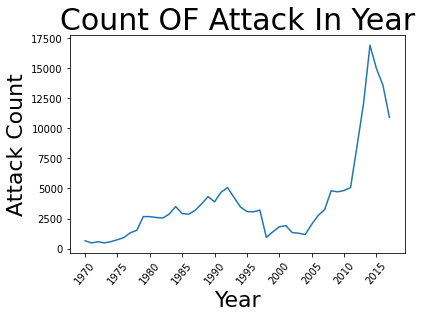

In [ ]:
attackYear=df.groupby('Year')['Attacktype'].count()
sns.lineplot(x=attackYear.index,y=attackYear)
plt.xticks(np.arange(min(df['Year']),max(df['Year']),5) ,rotation =50)
plt.xlabel('Year',fontsize=22)
plt.ylabel('Attack Count',fontsize=22)
plt.title('Count OF Attack In Year',fontsize=30)
plt.show()

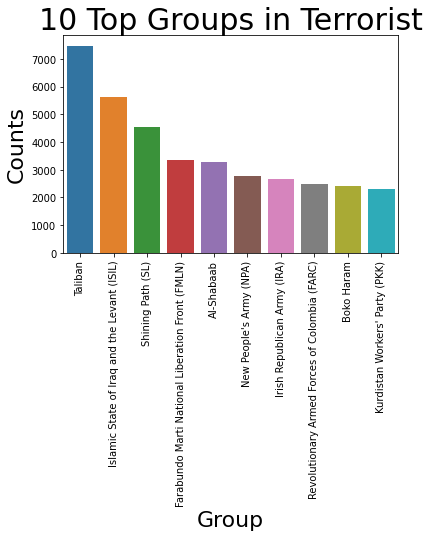

In [ ]:
groups=df[df['Group']!='Unknown']['Group']
g=groups.value_counts().sort_values(ascending=False)[:10]
sns.barplot(x=g.index,y=g)
plt.xticks(rotation = 90)
plt.xlabel('Group',fontsize=22)
plt.ylabel('Counts',fontsize=22)
plt.title('10 Top Groups in Terrorist',fontsize=30)
plt.show()

Text(0.5, 0, 'Year')

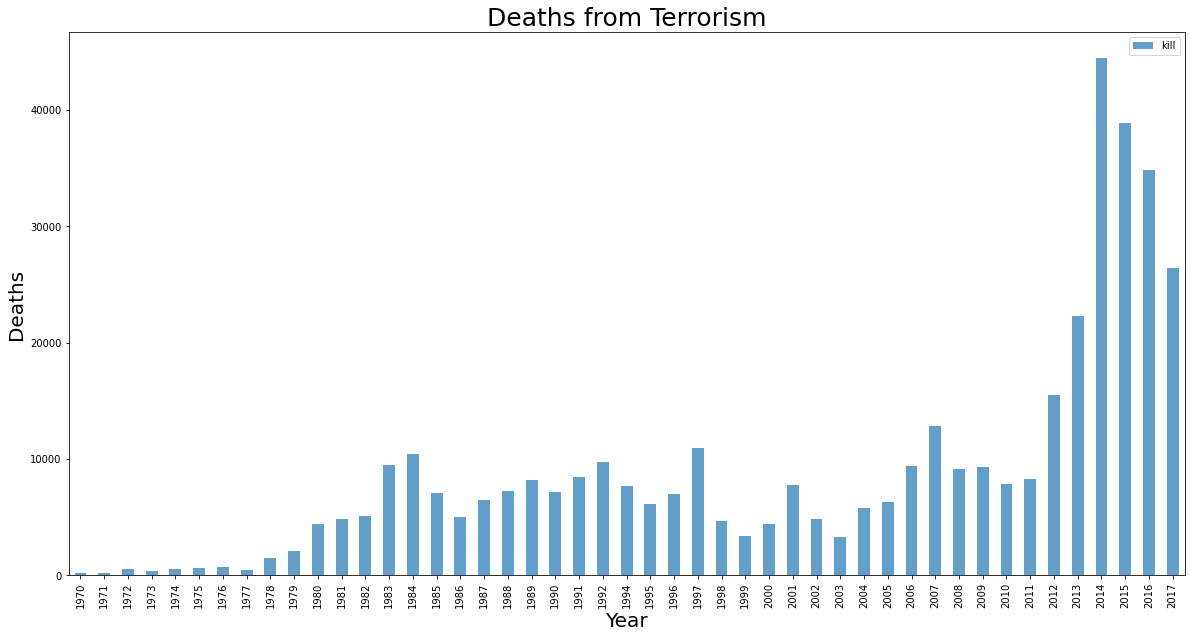

In [ ]:
kil = df[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
kil.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 90)
plt.title("Deaths from Terrorism",fontsize=25)
plt.ylabel("Deaths",fontsize=20)
plt.xlabel('Year',fontsize=20)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


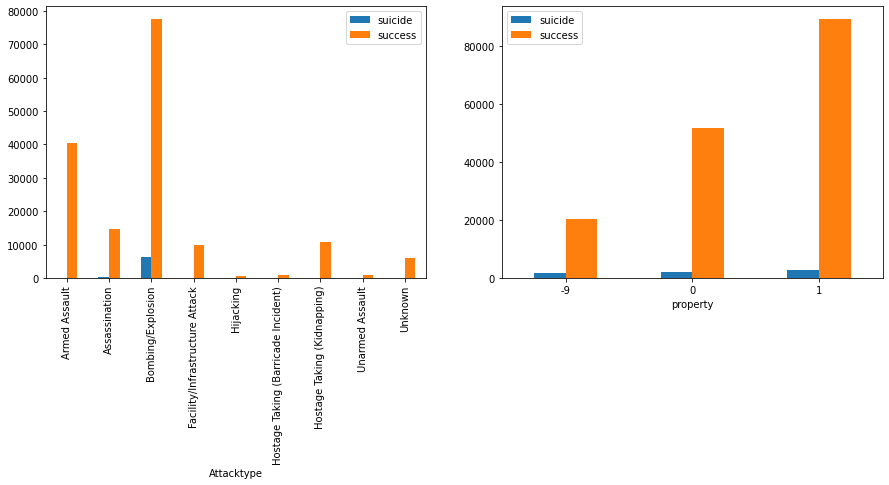

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
df.groupby('Attacktype')['suicide','success'].agg(sum).plot(kind='bar',ax=axes[0])
df.groupby('property')['suicide','success'].agg(sum).plot(kind='bar',ax=axes[1])
plt.xticks(rotation=360)
plt.show()

Text(0.5, 0, 'Year')

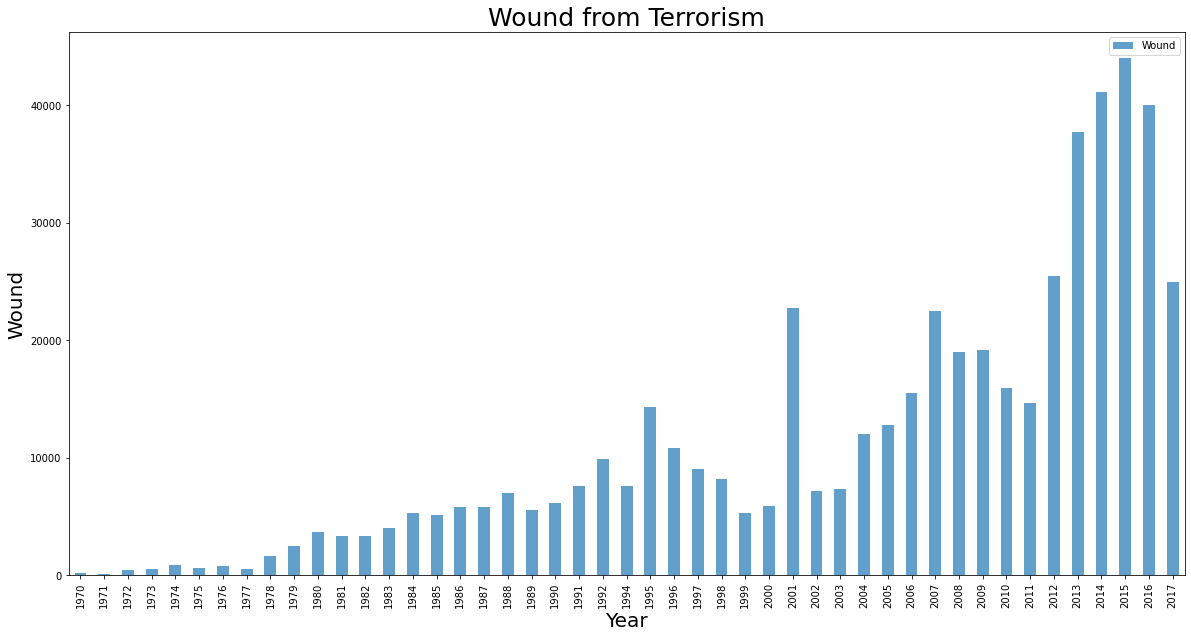

In [ ]:
kil = df[['Year','Wound']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
kil.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 90)
plt.title("Wound from Terrorism",fontsize=25)
plt.ylabel("Wound",fontsize=20)
plt.xlabel('Year',fontsize=20)

Text(0.5, 0, 'Year')

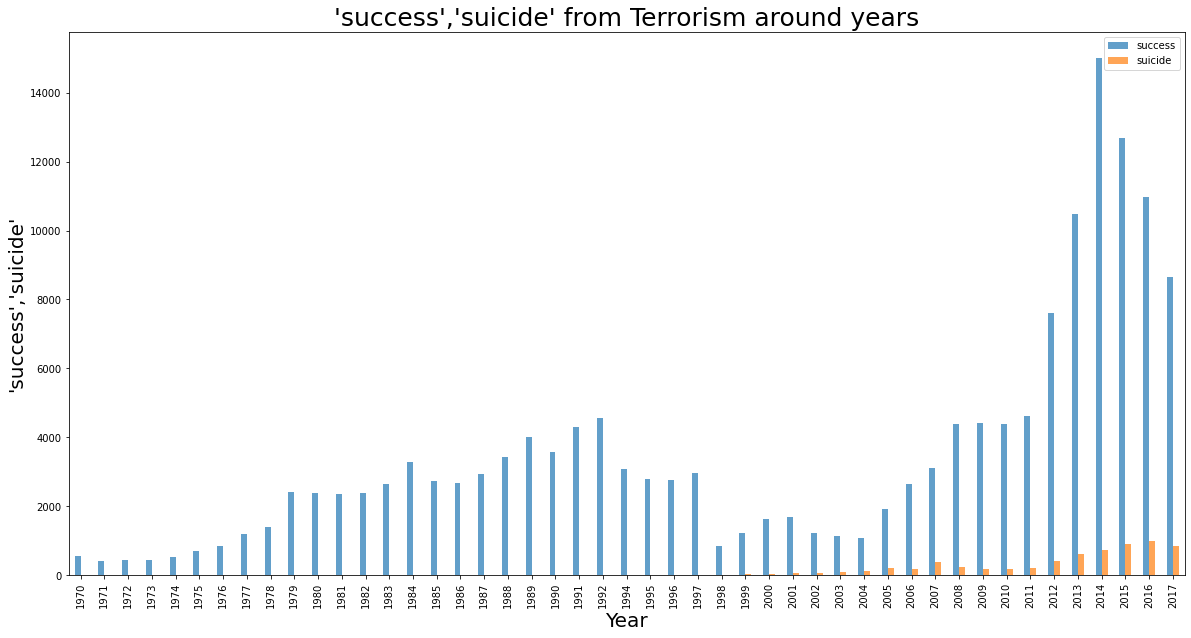

In [ ]:
kil = df[['Year','success','suicide']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(20,10))
kil.plot(kind='bar',alpha=0.7,ax=ax4)
plt.xticks(rotation = 90)
plt.title("'success','suicide' from Terrorism around years",fontsize=25)
plt.ylabel("'success','suicide'",fontsize=20)
plt.xlabel('Year',fontsize=20)

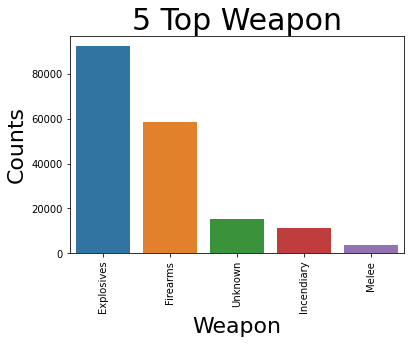

In [ ]:
CT=df['Weapon'].value_counts().sort_values(ascending=False)[:5]
sns.barplot(x=CT.index,y=CT)
plt.xticks(rotation = 90)
plt.xlabel('Weapon',fontsize=22)
plt.ylabel('Counts',fontsize=22)
plt.title('5 Top Weapon',fontsize=30)
plt.show()